# K-Means Unsupervised Learning
There are 3 examples to demonstrate the effectiveness and implementation of the K-means algorithm.</br></br>
The first two examples borrow code from a geeksforgeeks.com tutorial which computes the each part of the K-means algorithm (centroid definition, cluster assignment) separately and puts the intermediate results in a scatter plot. This allows for conceptual understanding of the algorithm and the ability to see how the algorithm converges to its result.</br></br>
The second example applies feature scaling to some dummy data to show how to make the algorithm generate more reasonable clusters.</br></br>
The third example leverages the scikit-learn library to identify the optimal number of clusters. It also uses the Clustering/KMeans library to run the algorithm more simply.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from copy import deepcopy

In [13]:
# K-means code for understanding. Borrowed from https://www.geeksforgeeks.org/k-means-clustering-introduction/

# measure distance between points
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

# Update centroid based on member points
def update_centroid(X, clusters):
    total_dist = 0
    for i in range(num_clusters):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_centroid = points.mean(axis =0)
            clusters[i]['centroid'] = new_centroid
            clusters[i]['points'] = []
            total_dist += sum([distance(p, new_centroid) for p in points])
    mean_dist = np.round(total_dist / len(X),2)
    return clusters, mean_dist
    
# Assign points to nearest cluster
def assign_clusters(X, clusters):
    for i in range(X.shape[0]):
        dist = []
        for j in range(num_clusters):
            dist.append(distance(X[i],clusters[j]['centroid']))
        clusters[np.argmin(dist)]['points'].append(X[i])
    return clusters

# Label samples by cluster for visualization
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(num_clusters):
            dist.append(distance(X[i],clusters[j]['centroid']))
        pred.append(np.argmin(dist))
    return pred

# Plot 2-d clusters of data and cluster centroids
def plot_clusters(X, centers, pred=[], title='', xlabel='', ylabel=''):
    # Plot initial results
    if pred==[]:
        plt.scatter(X[:,0],X[:,1])
    else:
        plt.scatter(X[:,0], X[:,1], c=pred)
    plt.grid(True)
    features = ['data']
    if centers is not None:
        plt.scatter(centers[:,0],centers[:,1],marker = '^',c = 'red')
    if pred==[]:
            features.append('centroid')
    plt.legend(features)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


## Ex 1: 3 blobs of data with 2 features
<b>Goal</b>: show how the algorithm iterates to the solution</br>
In practice, we'd use an existing library to implement the algorithm. For sake of understanding, we code it explicitly.
### Plot raw data and random initial centroids
The data points are circles. The centroids are red stars

In [9]:
num_clusters = 3

# Create random data with K logical clusters
X,y = make_blobs(n_samples = 500,n_features = 2,centers = num_clusters, center_box=(-6,6), random_state = 23)

# Define clusters as list of dicts w/ 'centroid' and assigned 'points' 
raw_clusters = []
np.random.seed(23)
for idx in range(num_clusters):
    centroid = 2*(np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'centroid' : centroid,
        'points' : []
    }
    raw_clusters.append(cluster)

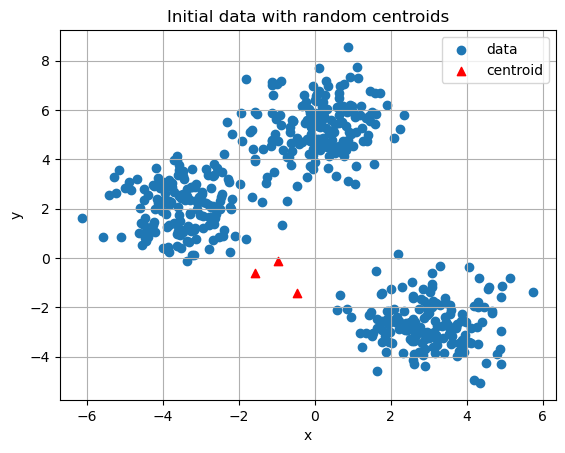

In [15]:
# Plot initial results
plot_clusters(X, np.array([raw_clusters[i]['centroid'] for i in range(num_clusters)]),
              pred=[], title='Initial data with random centroids', xlabel='x', ylabel='y')


### Apply K-means algorithm
<ul>
    <li>Assign data to nearest centroid</li>
    <li>Update centroid based on assigned points</li>
    <li>Repeat until converge</li>
</ul>

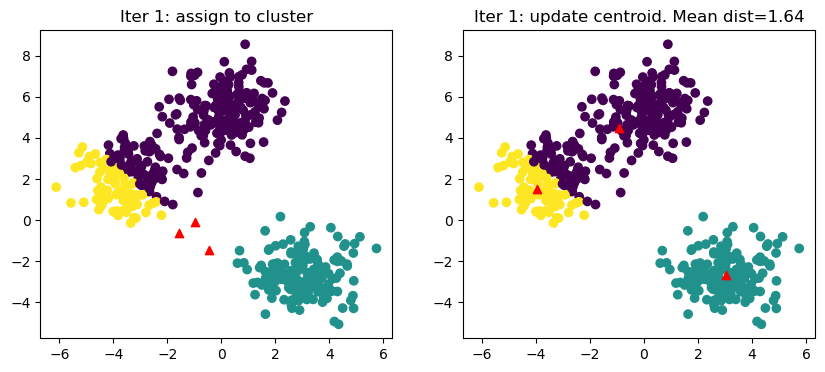

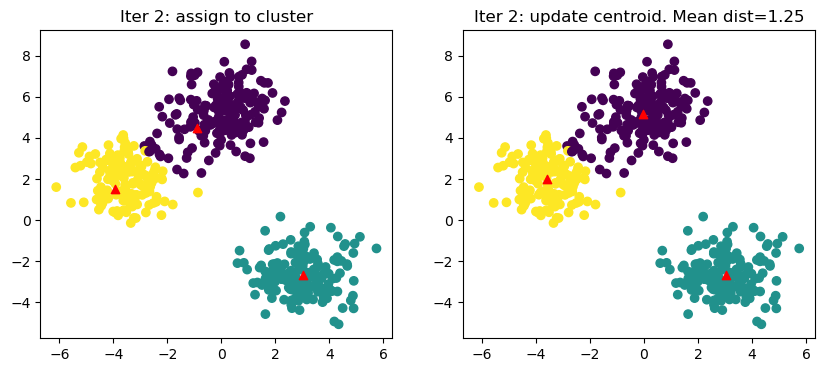

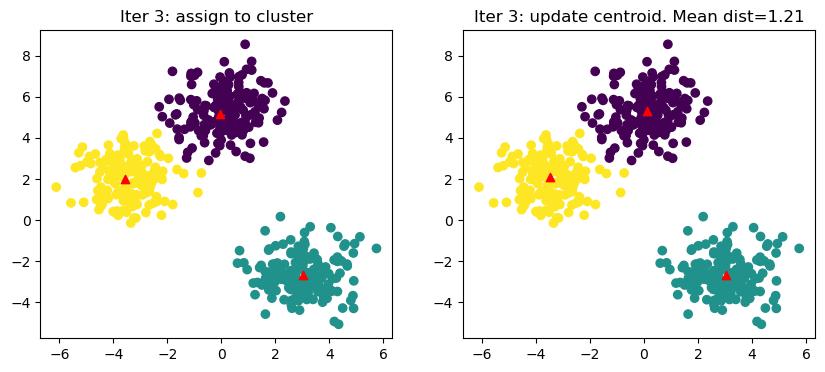

In [17]:
num_iters = 3
clusters = deepcopy(raw_clusters)
for iter in range(num_iters):
    plt.figure(figsize=(10,4))
    # Assign current points to cluster
    clusters = assign_clusters(X,clusters)
    pred = pred_cluster(X,clusters)
    plt.subplot(1,2, 1).scatter(X[:,0],X[:,1],c = pred)
    for i in range(len(clusters)):
        center = clusters[i]['centroid']
        plt.subplot(1,2, 1).scatter(center[0],center[1],marker = '^',c = 'red')
    plt.subplot(1,2,1).set_title(f"Iter {iter+1}: assign to cluster")

    # Update cluster centroid
    clusters, mean_dist = update_centroid(X,clusters)
    plt.subplot(1,2, 2).scatter(X[:,0],X[:,1],c = pred)
    for i in range(len(clusters)):
        center = clusters[i]['centroid']
        plt.subplot(1,2, 2).scatter(center[0],center[1],marker = '^',c = 'red')
    plt.subplot(1,2,2).set_title(f"Iter {iter+1}: update centroid. Mean dist={mean_dist}")
    plt.show()



## Ex 2: Clustering unbalanced data
<b>Goal</b>: understand how to improve clustering with feature scaling</br>
In this case, we cluster groups of people by height (meters) and weight (grams).
### Plot raw data and random initial centroids

In [19]:
num_clusters = 4
num_samples_per_group = 125
height_meters = [1.5, 1.8]
grams_per_meter = [45, 55]
height_std = 0.05
weight_std = 2.5
X = []
np.random.seed(23)
for h in height_meters:
    heights = np.random.normal(h, height_std, num_samples_per_group)
    for g in grams_per_meter:
        weights = [np.random.normal(g*h1,weight_std) for h1 in heights]
        X.extend([[x,y] for (x,y) in zip(weights,heights)])
X=np.array(X)

# Define clusters as list of dicts w/ 'centroid' and assigned 'points' 
raw_clusters = []
center = (np.mean(X[:,0]),np.mean(X[:,1]))
for idx in range(num_clusters):
    centroid = np.random.normal(center, (.5, .01))
    points = []
    cluster = {
        'centroid' : centroid,
        'points' : []
    }
    raw_clusters.append(cluster)

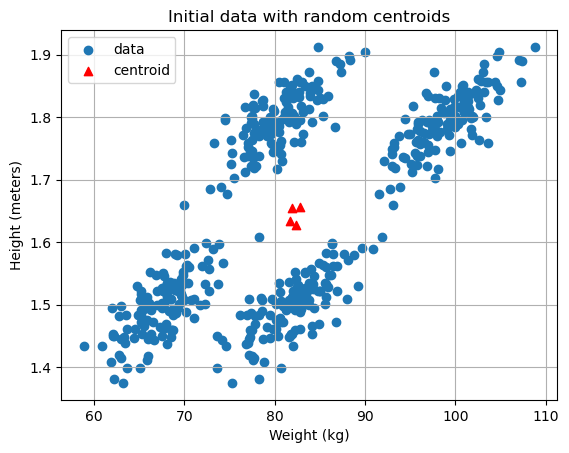

In [21]:
# Plot initial results
plot_clusters(X, np.array([raw_clusters[i]['centroid'] for i in range(num_clusters)]),
              pred=[], title='Initial data with random centroids', xlabel='Weight (kg)', ylabel='Height (meters)')


In this case, it appears there are 4 groups of people
<ul><li>short & light</li>
<li>short & heavy</li>
<li>tall & light</li>
<li>tall & heavy</li></ul>
So we'd expect a good clustering algorithm would find these groups.

### Apply K-means algorithm and stop after 10 iterations

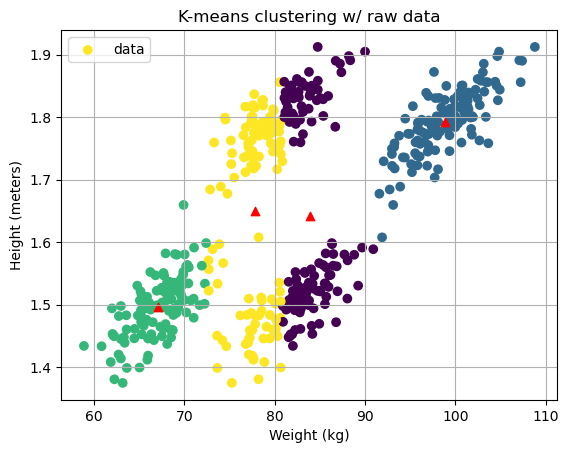

In [23]:
num_iters = 10
clusters = deepcopy(raw_clusters)
for iter in range(num_iters):
    # Assign current points to cluster
    clusters = assign_clusters(X,clusters)
    pred = pred_cluster(X,clusters)
    for i in range(len(clusters)):
        center = clusters[i]['centroid']
    # Update cluster centroid
    clusters, mean_dist = update_centroid(X,clusters)

plot_clusters(X, np.array([clusters[i]['centroid'] for i in range(num_clusters)]),
              pred=pred, title='K-means clustering w/ raw data', xlabel='Weight (kg)', ylabel='Height (meters)')

It appears that the algorithm just segmented people into 4 weight bands. Why?</br>
Because the K-means algorithm optimizes by euclidean distance, being in error by a few tenths of a meter is nothing compared to an error of thousands of grams. In other words, the clusters are circular.</br></br>
<b>Solution</b>: FEATURE SCALING</br>
Prior to starting the K-means algorithm, scale each feature such that they have the same variance. This allows for boundaries based on relative error.

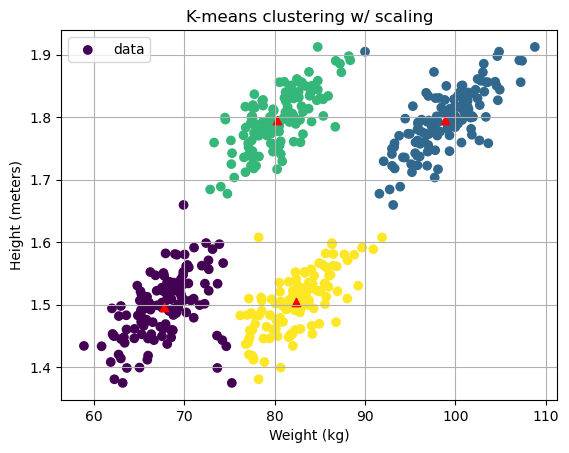

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

raw_clusters = {}
center = (np.mean(X_std[:,0]),np.mean(X_std[:,1]))
for idx in range(num_clusters):
    centroid = np.random.normal(center, (.1, .1))
    points = []
    cluster = {
        'centroid' : centroid,
        'points' : []
    }
    raw_clusters[idx] = cluster

num_iters = 10
clusters = deepcopy(raw_clusters)
for iter in range(num_iters):
    # Assign current points to cluster
    clusters = assign_clusters(X_std,clusters)
    pred = pred_cluster(X_std,clusters)
    for i in clusters:
        center = clusters[i]['centroid']
    # Update cluster centroid
    clusters, mean_dist = update_centroid(X_std,clusters)

centers = scaler.inverse_transform([clusters[i]['centroid'] for i in range(len(clusters))])
plot_clusters(X, centers,
              pred=pred, title='K-means clustering w/ scaling', xlabel='Weight (kg)', ylabel='Height (meters)')

which makes a lot more sense.</br>
Note: feature scaling is a very standard practice in machine learning; not just for K-means clustering.</br></br>
## Ex 3: Finding best value of k
<b>Goal</b>: Determine the right number of clusters to use</br>
From our height/weight dataset, we know the right number of clusters is 4. In practice, especially when there are many features, the correct cluster count is not clear.</br></br>
<b>Solution</b>: The "Elbow Method".</br>
As the number of clusters increases, the average cluster intertia decreases up to the limit where the number of clusters equals the number of data points. In that case, the inertia is zero.</br>
The elbow method runs the K-Means algorithm for several cluster counts and measures the total cluster inertia. Plotting the inertia vs the number of clusters looks like an "elbow": it drops sharply and then flattens out as more clusters offer diminishing returns.

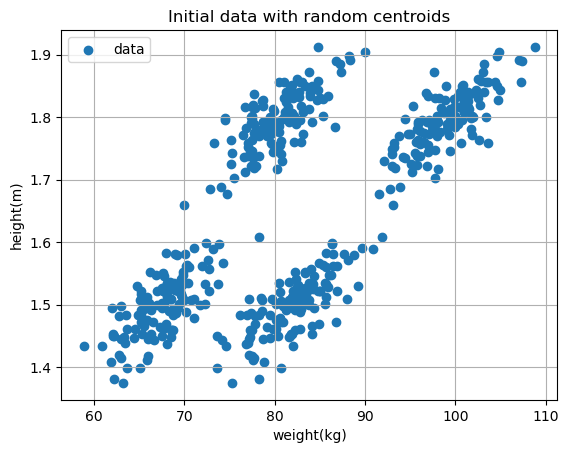

In [27]:
# Show initial data
# borrowed from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

plot_clusters(X, None,
              pred=[], title='Initial data with random centroids', xlabel='weight(kg)', ylabel='height(m)')

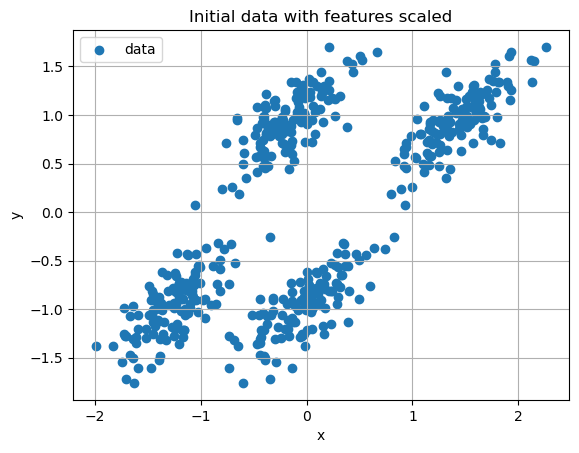

In [28]:
# Do feature scaling
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
plot_clusters(X_std, None,
              pred=[], title='Initial data with features scaled', xlabel='x', ylabel='y')

In [31]:
# Initialize lists to store distortion and inertia values
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

# Fit K-means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X_std)
    
    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(X_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X_std.shape[0])
    
    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)
    
    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

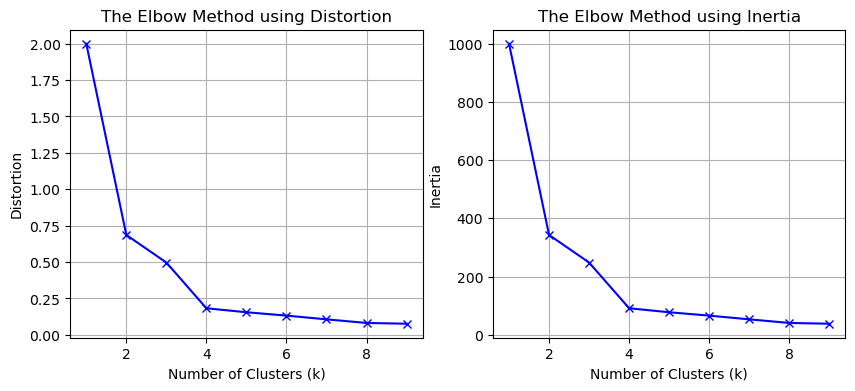

In [33]:
plt.figure(figsize=(10,4))
# Plotting the graph of k versus Distortion
plt.subplot(1,2,1).plot(K, distortions, 'bx-')
plt.subplot(1,2,1).set_xlabel('Number of Clusters (k)')
plt.subplot(1,2,1).set_ylabel('Distortion')
plt.subplot(1,2,1).set_title('The Elbow Method using Distortion')
plt.grid()

# Plotting the graph of k versus Inertia
plt.subplot(1,2,2).plot(K, inertias, 'bx-')
plt.subplot(1,2,2).set_xlabel('Number of Clusters (k)')
plt.subplot(1,2,2).set_ylabel('Inertia')
plt.subplot(1,2,2).set_title('The Elbow Method using Inertia')
plt.grid()
plt.show()

For both measures, there is diminishing returns after a cluster count (K) of 4, which agrees with our understanding of the data.</br>
For greater understanding, we will view the generated clusters when K varies from 1 to 6.

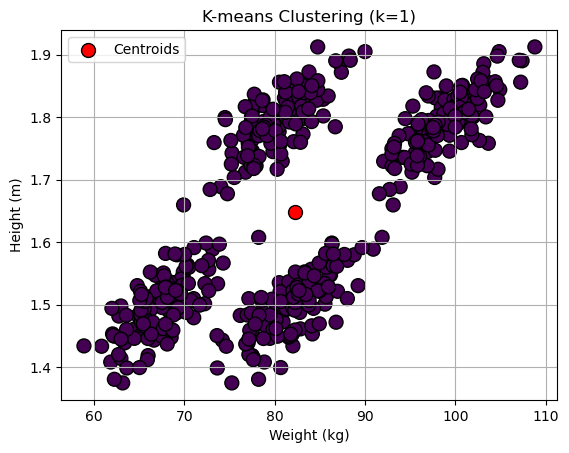

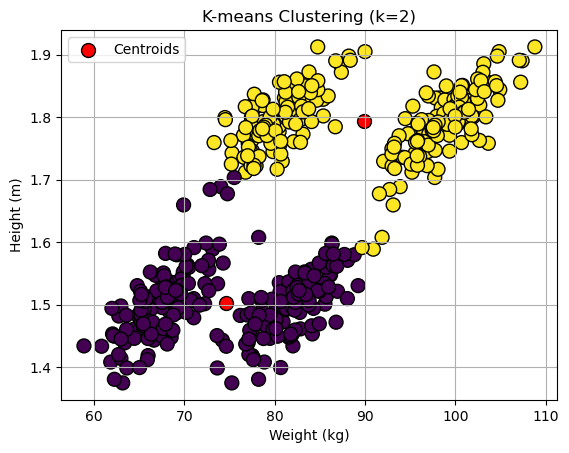

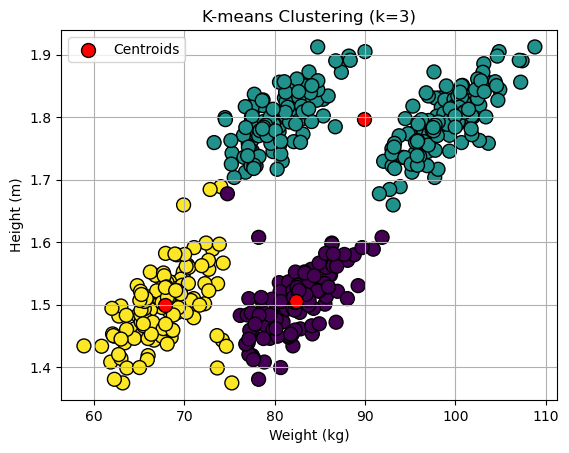

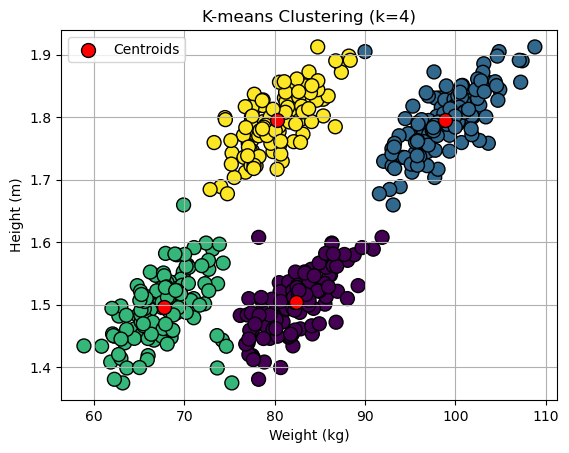

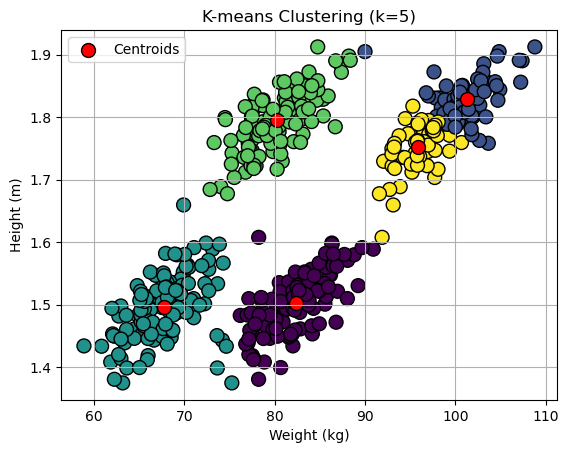

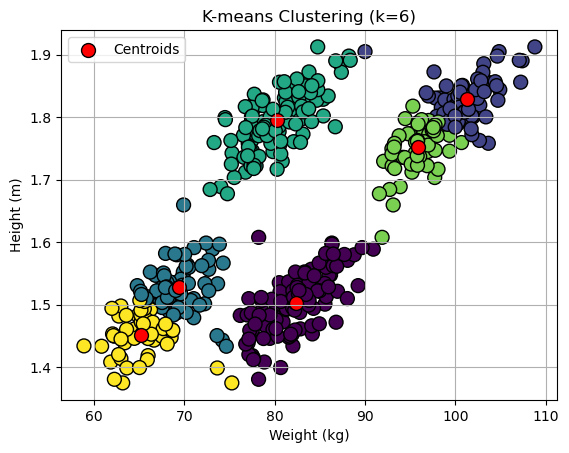

In [36]:
# Initialize a range of k values
k_range = range(1, 7)

# Fit and plot data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X_std)
    
    # Plot the clustered data points. Note that we plot "X" to see the original data clustered, and we inverse-transform
    # the kmeans.cluster_centers_ to see the center of the clusters.
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1],
                s=100, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Height (m)')
    plt.legend()
    plt.grid()
    plt.show()